# Exploratory Data Analysis

### Neste notebook o objetivo principal vai ser analisar os dados importados da API e perceber:
- Sazonalidades
- Correlações entre dados
- Impacto das nuvens, radiação e temperatura


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 43824 non-null  datetime64[ns]
 1   temperature_2m       43824 non-null  float64       
 2   shortwave_radiation  43824 non-null  float64       
 3   cloudcover           43824 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.3 MB


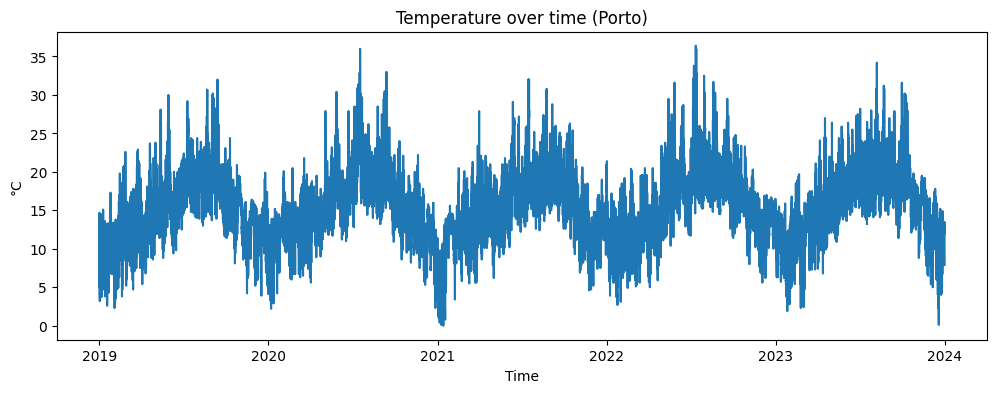

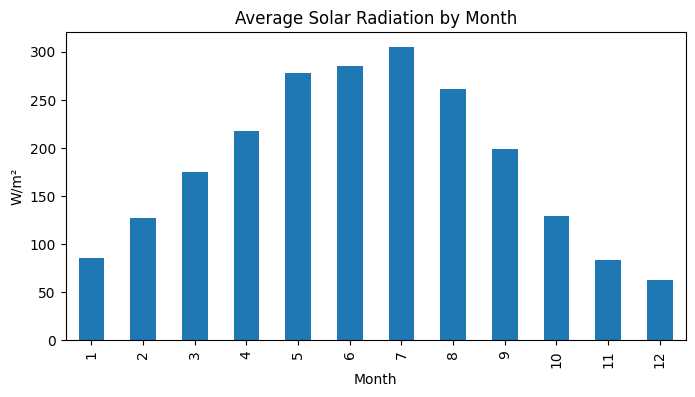

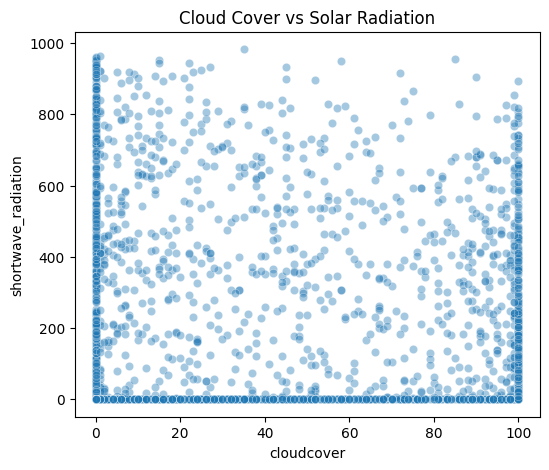

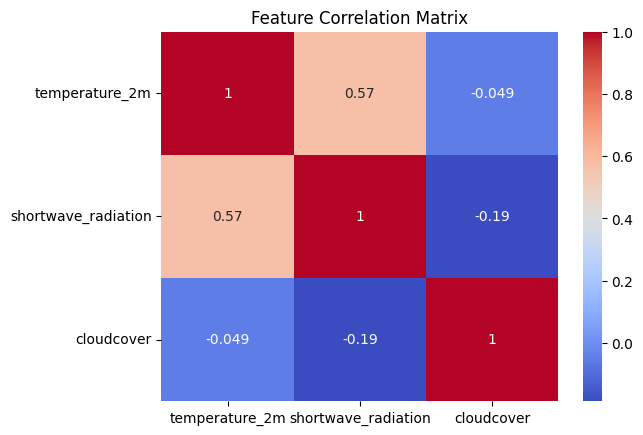

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/weather_data_2019-01-01_to_2023-12-31.csv", parse_dates=["time"])

df.head()

df.info()
# df.describe()

df.isna().sum()

# Visualizações

# Temperatura ao longo do tempo
plt.figure(figsize=(12,4))
plt.plot(df["time"], df["temperature_2m"])
plt.title("Temperature over time (Porto)")
plt.xlabel("Time")
plt.ylabel("°C")
plt.show()

# Radiação solar ao longo do tempo
df["month"] = df["time"].dt.month
df["hour"] = df["time"].dt.hour

monthly_radiation = df.groupby("month")["shortwave_radiation"].mean()

plt.figure(figsize=(8,4))
monthly_radiation.plot(kind="bar")
plt.title("Average Solar Radiation by Month")
plt.xlabel("Month")
plt.ylabel("W/m²")
plt.show()

# Relação entre cobertura de nuvens e radiação solar
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df.sample(3000),
    x="cloudcover",
    y="shortwave_radiation",
    alpha=0.4
)
plt.title("Cloud Cover vs Solar Radiation")
plt.show()

# Matriz de correlação
corr = df[[
    "temperature_2m",
    "shortwave_radiation",
    "cloudcover"
]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Insights

#### A temperatura acaba por ser uma variável estável com sazonalidade, apresenta maiores valores entre os meses 4 e 9 (primavera e verão), apresentando menores valores nos meses 10 a 3 (inverno e outono)

#### O gráfico da radiação solar também apresenta sazonalidade forte tal como a temperatura, justificando a inclusão de futuras variáveis temporais no modelo.

#### Apesar da correlação linear moderada, a análise visual confirma uma relação inversa clara entre cobertura de nuvens e radiação solar, sugerindo uma relação não linear. Ou seja no canto inferior direito, podemos ver uma maior concentração de pontos. Isto, porque quando o dia apresenta muitas nuvens (perto de 100%) a radiação emitida normalmente tende a ser menor. Por outro lado, quando o dia apresenta menos nuvens (perto de 0%), tende a apresentar maiores valores de radiação emitida.

#### No gráfico de correlações, todos os dados apresentam correlações moderadas, ou seja não próximas de 1.

#### Para redução de ruído do dados numa previsão de produção de energia, poderemos remover as horas que apresentam radiação 0 (noite), visto que a produção seria 0.